## 1. Importación de bibliotecas y carga de datos

In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
data = pd.read_csv('estrellas.csv')  
data.head()


,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star category,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,0,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,0,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,0,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,0,Brown Dwarf,Red,M


## 2. Exploración y limpieza de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (K)          240 non-null    int64  
 1   Luminosity (L/Lo)        240 non-null    float64
 2   Radius (R/Ro)            240 non-null    float64
 3   Absolute magnitude (Mv)  240 non-null    float64
 4   Star type                240 non-null    int64  
 5   Star category            240 non-null    object 
 6   Star color               240 non-null    object 
 7   Spectral Class           240 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 15.1+ KB


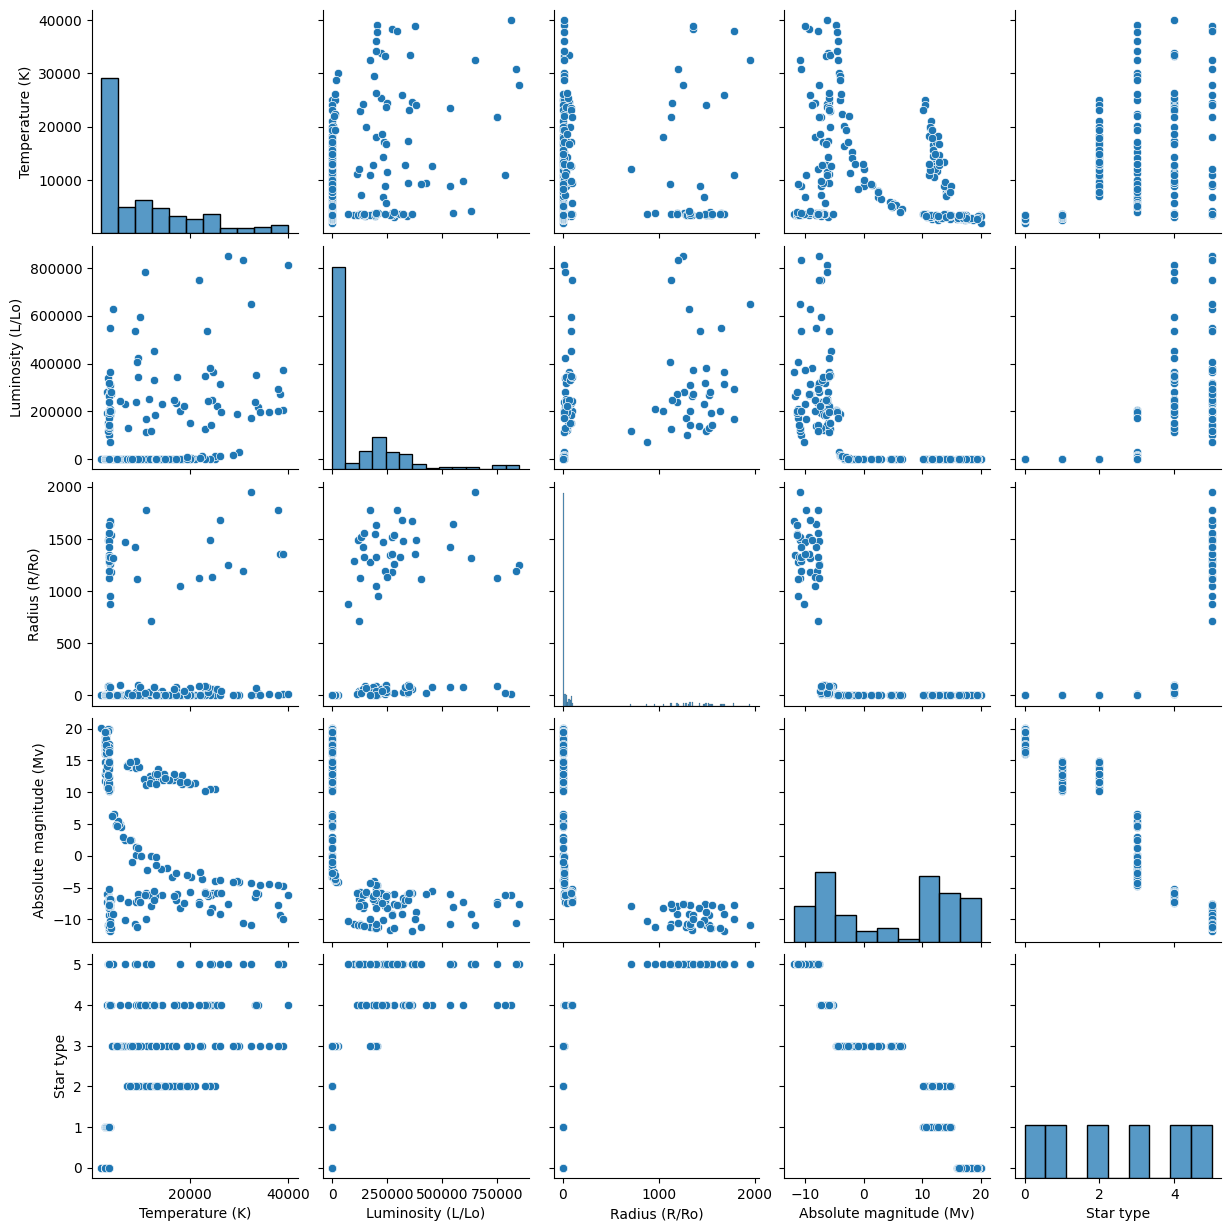

In [13]:
# Información general sobre el dataset
data.info()

# Descripción estadística de las variables numéricas
data.describe()

# Verificar si hay valores nulos
data.isnull().sum()

# Visualización de la distribución de las variables numéricas
sns.pairplot(data)
plt.show()


## 3. Preprocesamiento de datos

In [5]:
# Convertir columnas categóricas a variables dummy (one-hot encoding)
X = pd.get_dummies(data.drop(columns=['Spectral Class']))
y = data['Spectral Class']

# Dividir el dataset en conjuntos de entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Verificar las dimensiones de los conjuntos de datos
print(f'Tamaño de X_train_scaled: {X_train_scaled.shape}')
print(f'Tamaño de X_val_scaled: {X_val_scaled.shape}')
print(f'Tamaño de X_test_scaled: {X_test_scaled.shape}')


Tamaño de X_train_scaled: (168, 30)
Tamaño de X_val_scaled: (36, 30)
Tamaño de X_test_scaled: (36, 30)


## 4. Entrenamiento de modelos

### Modelo 1: K-Nearest Neighbors

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Evaluar el modelo
y_pred_knn = knn.predict(X_val_scaled)
print("KNN Accuracy:", accuracy_score(y_val, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_val, y_pred_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_val, y_pred_knn))


KNN Accuracy: 0.9444444444444444
KNN Classification Report:
               precision    recall  f1-score   support

           A       0.50      1.00      0.67         1
           B       0.89      1.00      0.94         8
           F       1.00      0.50      0.67         2
           K       0.00      0.00      0.00         1
           M       1.00      1.00      1.00        19
           O       1.00      1.00      1.00         5

    accuracy                           0.94        36
   macro avg       0.73      0.75      0.71        36
weighted avg       0.93      0.94      0.93        36

KNN Confusion Matrix:
 [[ 1  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  1  1  0  0  0]
 [ 1  0  0  0  0  0]
 [ 0  0  0  0 19  0]
 [ 0  0  0  0  0  5]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

### Modelo 2: Support Vector Machine

In [7]:
from sklearn.svm import SVC

# Entrenar el modelo SVM
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)

# Evaluar el modelo
y_pred_svm = svm.predict(X_val_scaled)
print("SVM Accuracy:", accuracy_score(y_val, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_val, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_val, y_pred_svm))


SVM Accuracy: 0.9722222222222222
SVM Classification Report:
               precision    recall  f1-score   support

           A       0.50      1.00      0.67         1
           B       1.00      1.00      1.00         8
           F       1.00      1.00      1.00         2
           K       0.00      0.00      0.00         1
           M       1.00      1.00      1.00        19
           O       1.00      1.00      1.00         5

    accuracy                           0.97        36
   macro avg       0.75      0.83      0.78        36
weighted avg       0.96      0.97      0.96        36

SVM Confusion Matrix:
 [[ 1  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 1  0  0  0  0  0]
 [ 0  0  0  0 19  0]
 [ 0  0  0  0  0  5]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

### Modelo 3: Random Forest

In [8]:
from sklearn.svm import SVC

# Entrenar el modelo SVM
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)

# Evaluar el modelo
y_pred_svm = svm.predict(X_val_scaled)
print("SVM Accuracy:", accuracy_score(y_val, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_val, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_val, y_pred_svm))

SVM Accuracy: 0.9722222222222222
SVM Classification Report:
               precision    recall  f1-score   support

           A       0.50      1.00      0.67         1
           B       1.00      1.00      1.00         8
           F       1.00      1.00      1.00         2
           K       0.00      0.00      0.00         1
           M       1.00      1.00      1.00        19
           O       1.00      1.00      1.00         5

    accuracy                           0.97        36
   macro avg       0.75      0.83      0.78        36
weighted avg       0.96      0.97      0.96        36

SVM Confusion Matrix:
 [[ 1  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 1  0  0  0  0  0]
 [ 0  0  0  0 19  0]
 [ 0  0  0  0  0  5]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

## 5. Ajuste de hiperparámetros y evaluación final

In [16]:
from sklearn.neighbors import KNeighborsClassifier

# Ajustar el modelo KNN con nuevos hiperparámetros
knn_tuned = KNeighborsClassifier(n_neighbors=7, metric='manhattan')
knn_tuned.fit(X_train_scaled, y_train)

# Evaluar el modelo ajustado
y_pred_knn_tuned = knn_tuned.predict(X_val_scaled)
print("Tuned KNN Accuracy:", accuracy_score(y_val, y_pred_knn_tuned))
print("Tuned KNN Classification Report:\n", classification_report(y_val, y_pred_knn_tuned))
print("Tuned KNN Confusion Matrix:\n", confusion_matrix(y_val, y_pred_knn_tuned))


Tuned KNN Accuracy: 0.9444444444444444
Tuned KNN Classification Report:
               precision    recall  f1-score   support

           A       0.50      1.00      0.67         1
           B       0.89      1.00      0.94         8
           F       1.00      0.50      0.67         2
           K       0.00      0.00      0.00         1
           M       1.00      1.00      1.00        19
           O       1.00      1.00      1.00         5

    accuracy                           0.94        36
   macro avg       0.73      0.75      0.71        36
weighted avg       0.93      0.94      0.93        36

Tuned KNN Confusion Matrix:
 [[ 1  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  1  1  0  0  0]
 [ 1  0  0  0  0  0]
 [ 0  0  0  0 19  0]
 [ 0  0  0  0  0  5]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [17]:
from sklearn.svm import SVC

# Ajustar el modelo SVM con nuevos hiperparámetros
svm_tuned = SVC(kernel='rbf', C=2)
svm_tuned.fit(X_train_scaled, y_train)

# Evaluar el modelo ajustado
y_pred_svm_tuned = svm_tuned.predict(X_val_scaled)
print("Tuned SVM Accuracy:", accuracy_score(y_val, y_pred_svm_tuned))
print("Tuned SVM Classification Report:\n", classification_report(y_val, y_pred_svm_tuned))
print("Tuned SVM Confusion Matrix:\n", confusion_matrix(y_val, y_pred_svm_tuned))


Tuned SVM Accuracy: 0.9444444444444444
Tuned SVM Classification Report:
               precision    recall  f1-score   support

           A       0.00      0.00      0.00         1
           B       0.89      1.00      0.94         8
           F       1.00      1.00      1.00         2
           K       0.00      0.00      0.00         1
           M       1.00      1.00      1.00        19
           O       1.00      1.00      1.00         5

    accuracy                           0.94        36
   macro avg       0.65      0.67      0.66        36
weighted avg       0.92      0.94      0.93        36

Tuned SVM Confusion Matrix:
 [[ 0  1  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 1  0  0  0  0  0]
 [ 0  0  0  0 19  0]
 [ 0  0  0  0  0  5]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar el modelo Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_scaled, y_train)

# Evaluar el modelo
y_pred_rf = rf.predict(X_val_scaled)
print("Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_val, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_val, y_pred_rf))


Random Forest Accuracy: 0.9444444444444444
Random Forest Classification Report:
               precision    recall  f1-score   support

           A       1.00      1.00      1.00         1
           B       0.89      1.00      0.94         8
           F       0.50      0.50      0.50         2
           K       0.00      0.00      0.00         1
           M       1.00      1.00      1.00        19
           O       1.00      1.00      1.00         5

    accuracy                           0.94        36
   macro avg       0.73      0.75      0.74        36
weighted avg       0.92      0.94      0.93        36

Random Forest Confusion Matrix:
 [[ 1  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  1  1  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  0  0 19  0]
 [ 0  0  0  0  0  5]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

## 6. Selección del mejor modelo y evaluación en el conjunto de prueba

In [10]:
# Ajuste de hiperparámetros y reevaluación (como ejemplo, ajustar algunos parámetros del modelo Random Forest)
rf_tuned = RandomForestClassifier(n_estimators=200, max_depth=10)
rf_tuned.fit(X_train_scaled, y_train)

# Evaluar el modelo ajustado
y_pred_rf_tuned = rf_tuned.predict(X_val_scaled)
print("Tuned Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf_tuned))
print("Tuned Random Forest Classification Report:\n", classification_report(y_val, y_pred_rf_tuned))
print("Tuned Random Forest Confusion Matrix:\n", confusion_matrix(y_val, y_pred_rf_tuned))


Tuned Random Forest Accuracy: 0.8888888888888888
Tuned Random Forest Classification Report:
               precision    recall  f1-score   support

           A       0.50      1.00      0.67         1
           B       0.80      1.00      0.89         8
           F       0.00      0.00      0.00         2
           K       0.00      0.00      0.00         1
           M       1.00      1.00      1.00        19
           O       1.00      0.80      0.89         5

    accuracy                           0.89        36
   macro avg       0.55      0.63      0.57        36
weighted avg       0.86      0.89      0.87        36

Tuned Random Forest Confusion Matrix:
 [[ 1  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 1  1  0  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  0  0 19  0]
 [ 0  1  0  0  0  4]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [11]:
# Seleccionar el mejor modelo basado en las métricas de validación (suponiendo que el Random Forest es el mejor)
best_model = rf_tuned

# Evaluar el mejor modelo en el conjunto de prueba
y_pred_test = best_model.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Test Classification Report:\n", classification_report(y_test, y_pred_test))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))


Test Accuracy: 0.9166666666666666
Test Classification Report:
               precision    recall  f1-score   support

           A       1.00      0.50      0.67         2
           B       0.88      1.00      0.93         7
           F       0.50      1.00      0.67         1
           K       0.00      0.00      0.00         2
           M       0.94      1.00      0.97        16
           O       1.00      1.00      1.00         8

    accuracy                           0.92        36
   macro avg       0.72      0.75      0.71        36
weighted avg       0.88      0.92      0.89        36

Test Confusion Matrix:
 [[ 1  1  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  1  0  1  0]
 [ 0  0  0  0 16  0]
 [ 0  0  0  0  0  8]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  